<a href="https://colab.research.google.com/github/SitiZumarohdf/PCVK_Genap_2023/blob/main/Week_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import folder yang ada di Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Import Library**


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

Membuat  fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element 
Dilasi (SED) berbentuk cross 3 x 3 **tanpa menggunakan library** morphology dari 
openCV

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


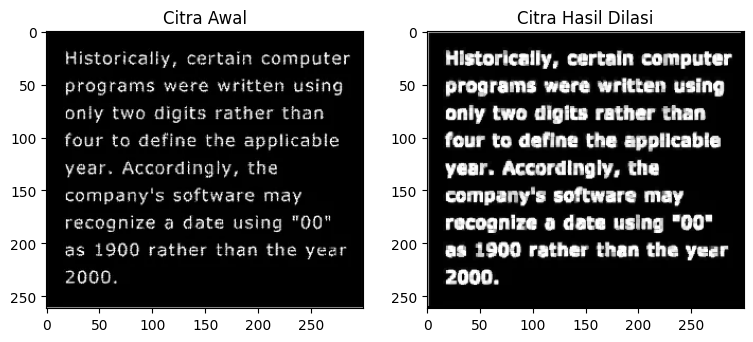

In [3]:
# DILASI TANPA LIBRARY

# Input image
input_dilasi_no_library = cv2.imread('/content/drive/MyDrive/PCVK/Image/morphology.png')
input_dilasi_no_library = cv2.cvtColor(input_dilasi_no_library, cv2.COLOR_BGR2GRAY)

# Membuat struktur element berbentuk square 3x3
se = np.ones((3,3))

def morph_dilate(img, kernel):
    # Menentukan baris dan kolom citra
    rows = img.shape[0]
    cols = img.shape[1]
    dilate_img=np.zeros((rows,cols))

    newimg=np.zeros((img.shape[0]+2,img.shape[1]+2))
    newimg[1:-1,1:-1]=img
    for x in range(0,rows-(kernel.shape[0]-1)):
        for y in range(0,cols-kernel.shape[0]-1):
            dilate_img[x,y]=np.max(se * newimg[x:x+kernel.shape[0],y:y+kernel.shape[0]])

    return dilate_img

# Citra hasil dilasi
output_dilasi_no_library = morph_dilate(input_dilasi_no_library, se)

# Membuat figure
fig, axs = plt.subplots(1, 2, figsize=(9,5))

# menampilkan structuring element
print(se)

# Menampilkan citra awal
axs[0].set_title("Citra Awal")
axs[0].imshow(input_dilasi_no_library, cmap='gray')

# Menampilkan citra hasil dilasi
axs[1].set_title("Citra Hasil Dilasi")
axs[1].imshow(output_dilasi_no_library, cmap='gray')

Membuat program implementasi operasi dilasi Structuring Element Dilasi (SED) 
berbentuk cross 3 x 3 **dengan menggunakan library** morphology dari openCV

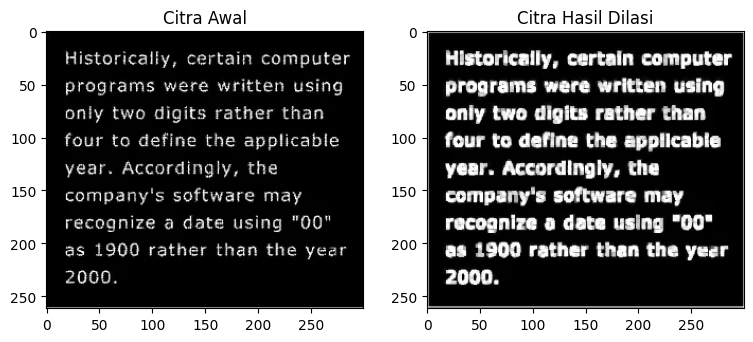

In [4]:
# DILASI DENGAN MENGGUNAKAN LIBRARY

# Input image
input_dilasi_with_library = cv2.imread('/content/drive/MyDrive/PCVK/Image/morphology.png')

# Membuat struktur element berbentuk square 3x3
se = np.ones((3,3))

# Hasil dilasi menggunakan library opencv morphology
output_dilasi_with_library = cv2.morphologyEx(input_dilasi_with_library, cv2.MORPH_DILATE, se)

# Membuat figure
fig, axs = plt.subplots(1, 2, figsize=(9,5))

# Menampilkan citra awal
axs[0].set_title("Citra Awal")
axs[0].imshow(input_dilasi_with_library)

# Menampilkan citra hasil dilasi
axs[1].set_title("Citra Hasil Dilasi")
axs[1].imshow(output_dilasi_with_library)

Membuat h fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element 
Erosi (SE) berbentuk square 5 x 5 **tanpa menggunakan library** morphology dari 
openCV

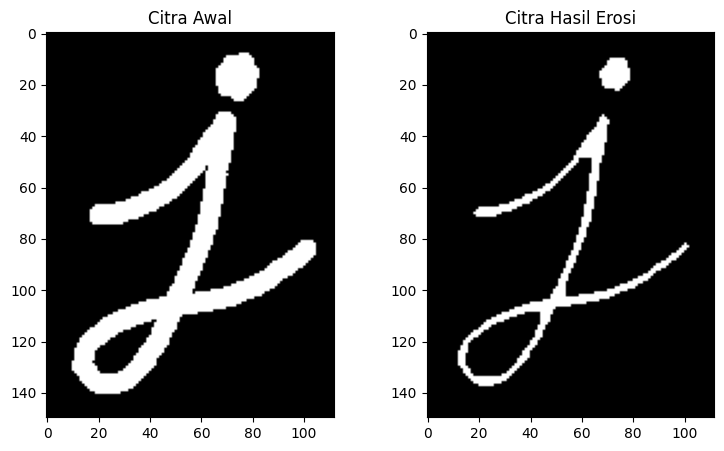

In [5]:
# EROSI TANPA LIBRARY

# Input image
input_erosi_no_library = cv2.imread('/content/drive/MyDrive/PCVK/Image/j.png')
input_erosi_no_library = cv2.cvtColor(input_erosi_no_library, cv2.COLOR_BGR2GRAY)

# Membuat struktur element berbentuk square 5x5
se = np.ones((5,5))

def morph_erode(img, kernel):
    # Menentukan baris dan kolom citra
    rows = img.shape[0]
    cols = img.shape[1]
    erode_img=np.zeros((rows,cols))

    newimg=np.zeros((img.shape[0]+2,img.shape[1]+2))
    newimg[1:-1,1:-1]=img
    for x in range(0,rows-(kernel.shape[0]-1)):
        for y in range(0,cols-(kernel.shape[0]-1)):
            erode_img[x,y]=np.min(se * newimg[x:x+kernel.shape[0],y:y+kernel.shape[0]])
    return erode_img

# Citra hasil erosi
output_erosi_no_library = morph_erode(input_erosi_no_library, se)

# Membuat figure
fig, axs = plt.subplots(1, 2, figsize=(9,5))

# Menampilkan citra awal
axs[0].set_title("Citra Awal")
axs[0].imshow(input_erosi_no_library, cmap='gray')

# Menampilkan citra hasil erosi
axs[1].set_title("Citra Hasil Erosi")
axs[1].imshow(output_erosi_no_library, cmap='gray')

Membuat program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk 
square 5 x 5 **dengan menggunakan library** morphology dari openCV

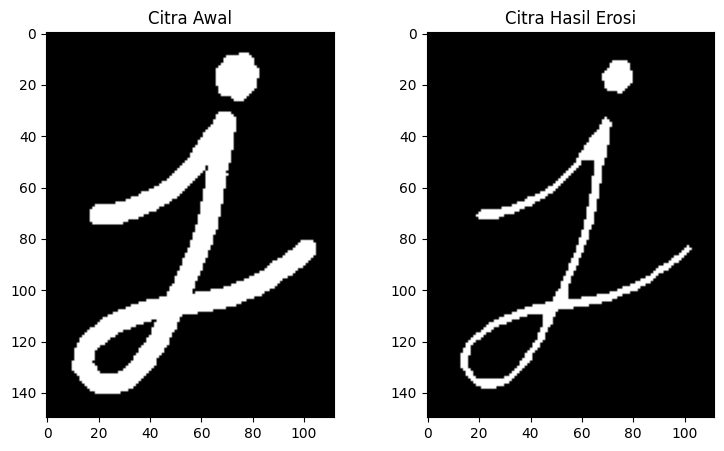

In [6]:
# EROSI DENGAN MENGGUNAKAN LIBRARY

# Input image
input_erosi_with_library = cv2.imread('/content/drive/MyDrive/PCVK/Image/j.png')

# Membuat structured element berbentuk square 5x5
se = np.ones((5,5))

# Hasil erosi menggunakan library opencv morphology
output_erosi_with_library = cv2.morphologyEx(input_erosi_with_library, cv2.MORPH_ERODE, se)

# Membuat figure
fig, axs = plt.subplots(1, 2, figsize=(9,5))

# Menampilkan citra awal
axs[0].set_title("Citra Awal")
axs[0].imshow(input_erosi_with_library)

# Menampilkan citra hasil erosi
axs[1].set_title("Citra Hasil Erosi")
axs[1].imshow(output_erosi_with_library)

Membuat program implementasi operasi opening dengan Structuring Element 
berbentuk square 3 x 3 **tanpa dan dengan** menggunakan library morphology dari 
openCV

In [ ]:
# Erosi tanpa library

# Input image
input_opening_erosi_no_library = cv2.imread('/content/drive/MyDrive/PCVK/Image/fingerprint.png')
input_opening_erosi_no_library = cv2.cvtColor(input_opening_erosi_no_library, cv2.COLOR_BGR2GRAY)

# Membuat structured element berbentuk square 3x3
se = np.ones((3,3))

def morph_erode(img, kernel):
    # Menentukan baris dan kolom citra
    rows = img.shape[0]
    cols = img.shape[1]
    erode_img=np.zeros((rows,cols))

    newimg=np.zeros((img.shape[0]+2,img.shape[1]+2))
    newimg[1:-1,1:-1]=img
    for x in range(0,rows-(kernel.shape[0]-1)):
        for y in range(0,cols-(kernel.shape[0]-1)):
            erode_img[x,y]=np.min(se * newimg[x:x+kernel.shape[0],y:y+kernel.shape[0]])
    return erode_img

# Citra hasil erosi
output_opening_erosi_no_library = morph_erode(input_opening_erosi_no_library, se)

# Membuat figure
fig, axs = plt.subplots(1, 2, figsize=(9,5))

# Menampilkan citra awal
axs[0].set_title("Citra Awal")
axs[0].imshow(input_opening_erosi_no_library, cmap='gray')

# Menampilkan citra hasil erosi
axs[1].set_title("Citra Hasil Erosi")
axs[1].imshow(output_opening_erosi_no_library, cmap='gray')

In [ ]:
# Dilasi tanpa library

# Input image
input_opening_dilasi_no_library = output_opening_erosi_no_library

# Membuat structured element berbentuk square 3x3
se = np.ones((3,3))

def morph_dilate(img, kernel):
    # Menentukan baris dan kolom citra
    rows = img.shape[0]
    cols = img.shape[1]
    dilate_img=np.zeros((rows,cols))

    newimg=np.zeros((img.shape[0]+2,img.shape[1]+2))
    newimg[1:-1,1:-1]=img
    for x in range(0,rows-(kernel.shape[0]-1)):
        for y in range(0,cols-kernel.shape[0]-1):
            dilate_img[x,y]=np.max(se * newimg[x:x+kernel.shape[0],y:y+kernel.shape[0]])

    return dilate_img

# Citra hasil dilasi
output_opening_dilasi_no_library = morph_dilate(input_opening_dilasi_no_library, se)

# Membuat figure
fig, axs = plt.subplots(1, 2, figsize=(9,5))

# Menampilkan citra awal
axs[0].set_title("Citra Hasil Erosi")
axs[0].imshow(input_opening_dilasi_no_library, cmap='gray')

# Menampilkan citra hasil dilasi
axs[1].set_title("Citra Hasil Opening")
axs[1].imshow(output_opening_dilasi_no_library, cmap='gray')

In [ ]:
# Erosi dengan library opencv

# Input image
input_opening_erosi_with_library = cv2.imread('/content/drive/MyDrive/PCVK_AB/fingerprint.png')

# Membuat structured element berbentuk square 5x5
se = np.ones((3,3))

# Hasil erosi menggunakan library opencv erode()
output_opening_erosi_with_library = cv2.morphologyEx(input_opening_erosi_with_library, cv2.MORPH_ERODE, se)

# Membuat figure
fig, axs = plt.subplots(1, 2, figsize=(9,5))

# Menampilkan citra awal
axs[0].set_title("Citra Awal")
axs[0].imshow(input_opening_erosi_with_library)

# Menampilkan citra hasil erosi
axs[1].set_title("Citra Hasil Erosi")
axs[1].imshow(output_opening_erosi_with_library)

In [ ]:
# Dilasi dengan library opencv

# Input image
input_opening_dilasi_with_library = output_opening_erosi_with_library

# Membuat structured element berbentuk square 3x3
se = np.ones((3,3))

# Hasil dilasi menggunakan library opencv dilate()
output_opening_dilasi_with_library= cv2.morphologyEx(input_opening_dilasi_with_library, cv2.MORPH_DILATE, se)

# Membuat figure
fig, axs = plt.subplots(1, 2, figsize=(9,5))

# Menampilkan citra awal
axs[0].set_title("Citra Hasil Erosi")
axs[0].imshow(input_opening_dilasi_with_library)

# Menampilkan citra hasil dilasi
axs[1].set_title("Citra Hasil Opening")
axs[1].imshow(output_opening_dilasi_with_library)

In [ ]:
# Dilasi tanpa library

# Input image
input_closing_dilasi_no_library = cv2.imread('/content/drive/MyDrive/PCVK_AB/fingerprint.png')
input_closing_dilasi_no_library = cv2.cvtColor(input_closing_dilasi_no_library, cv2.COLOR_BGR2GRAY)

# Membuat structured element berbentuk square 3x3
se = np.ones((3,3))

def morph_dilate(img, kernel):
    # Menentukan baris dan kolom citra
    rows = img.shape[0]
    cols = img.shape[1]
    dilate_img=np.zeros((rows,cols))

    newimg=np.zeros((img.shape[0]+2,img.shape[1]+2))
    newimg[1:-1,1:-1]=img
    for x in range(0,rows-(kernel.shape[0]-1)):
        for y in range(0,cols-kernel.shape[0]-1):
            dilate_img[x,y]=np.max(se * newimg[x:x+kernel.shape[0],y:y+kernel.shape[0]])

    return dilate_img

# Citra hasil dilasi
output_closing_dilasi_no_library = morph_dilate(input_closing_dilasi_no_library, se)

# Membuat figure
fig, axs = plt.subplots(1, 2, figsize=(9,5))

# Menampilkan citra awal
axs[0].set_title("Citra Asli")
axs[0].imshow(input_closing_dilasi_no_library, cmap='gray')

# Menampilkan citra hasil dilasi
axs[1].set_title("Citra Hasil Dilasi")
axs[1].imshow(output_closing_dilasi_no_library, cmap='gray')